<a href="https://colab.research.google.com/github/Loreto-bln/1-web-L-becalos/blob/master/Copia_de_Desaparecidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
dataset= "/content/drive/MyDrive/dataSet/"

In [ ]:
df = pd.DataFrame()
df_current = pd.DataFrame()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  #le agregamos la codificación para manejar caracteres especiales y el utf-8 no los interpreta
  df = pd.read_csv(dataset + 'dataSetDesaparecidos.csv', encoding='latin1')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,2018-04-26,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36261,2018-01-08,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36262,2015-02-02,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36263,2017-08-22,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


Lectura finalizada


In [ ]:
def datosGenerales(df):
  print('Información general del DataFrame\n')
  print(f'Cantidad de filas y columnas: {df.shape}\n')
  print("-"*40)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*40)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print(f'Tipos de datos por columna: \n{df.dtypes}')
  print("-"*40)

datosGenerales(df)

Información general del DataFrame

Cantidad de filas y columnas: (36265, 15)

----------------------------------------
Cantidad de datos nulos por columna: 
Fecha en que se le vio por ultima vez        0
Hora en que se le vio por ultima vez         0
Pais en que se le vio por ultima vez         0
Entidad en que se le vio por ultima vez      0
Municipio en que se le vio por ultima vez    0
Localidad en que se le vio por ultima vez    0
Nacionalidad                                 0
Estatura                                     0
Complexion                                   0
Sexo                                         0
Edad                                         0
Descripcion de senas particulares            0
Etnia                                        0
Discapacidad                                 0
Dependencia que envio la informacion         0
dtype: int64
----------------------------------------
Cantidad de datos únicos por columna: 
Fecha en que se le vio por ultima vez        

In [ ]:
df_current = df.copy()
df_current.head()

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO


In [ ]:
df_current['Fecha en que se le vio por ultima vez'] = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce')
df_current['Año'] = df_current['Fecha en que se le vio por ultima vez'].dt.year
df_current['Año'] = df_current['Año'].fillna(0).astype(int)
df_current['Hora en que se le vio por ultima vez'] = pd.to_datetime(df_current['Hora en que se le vio por ultima vez'], format='%H:%M:%S', errors='coerce').dt.time
numeric_cols = ['Estatura', 'Edad']
df_current[numeric_cols] = df_current[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_current['Complexion'] = df_current['Complexion'].str.lower()
df_current.drop_duplicates(inplace=True)
datosGenerales(df_current)

Información general del DataFrame

Cantidad de filas y columnas: (35872, 16)

----------------------------------------
Cantidad de datos nulos por columna: 
Fecha en que se le vio por ultima vez          308
Hora en que se le vio por ultima vez            16
Pais en que se le vio por ultima vez             0
Entidad en que se le vio por ultima vez          0
Municipio en que se le vio por ultima vez        0
Localidad en que se le vio por ultima vez        0
Nacionalidad                                     0
Estatura                                     10644
Complexion                                       0
Sexo                                             0
Edad                                          2883
Descripcion de senas particulares                0
Etnia                                            0
Discapacidad                                     0
Dependencia que envio la informacion             0
Año                                              0
dtype: int64
--------------

In [ ]:
df_current['Edad'] = df_current['Edad'].fillna(df_current['Edad'].mean()).round().astype(int)
df_current['Estatura'] = df_current['Estatura'].fillna(df_current['Estatura'].mean()).round(2)
df_current['Fecha en que se le vio por ultima vez'].fillna('1900-01-01', inplace=True)
df_current['Hora en que se le vio por ultima vez'].fillna('00:00:00', inplace=True)
datosGenerales(df_current)

Información general del DataFrame

Cantidad de filas y columnas: (35872, 16)

----------------------------------------
Cantidad de datos nulos por columna: 
Fecha en que se le vio por ultima vez        0
Hora en que se le vio por ultima vez         0
Pais en que se le vio por ultima vez         0
Entidad en que se le vio por ultima vez      0
Municipio en que se le vio por ultima vez    0
Localidad en que se le vio por ultima vez    0
Nacionalidad                                 0
Estatura                                     0
Complexion                                   0
Sexo                                         0
Edad                                         0
Descripcion de senas particulares            0
Etnia                                        0
Discapacidad                                 0
Dependencia que envio la informacion         0
Año                                          0
dtype: int64
----------------------------------------
Cantidad de datos únicos por columna:

<ipython-input-43-896abda1ca61>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_current['Fecha en que se le vio por ultima vez'].fillna('1900-01-01', inplace=True)
<ipython-input-43-896abda1ca61>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
print(df_current['Estatura'].describe())

count    35872.000000
mean         1.686803
std          1.929976
min          0.300000
25%          1.620000
50%          1.690000
75%          1.700000
max        170.000000
Name: Estatura, dtype: float64


In [ ]:
df_current['Año'] = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce').dt.year
df_current['Estatura'] = pd.to_numeric(df_current['Estatura'], errors='coerce')
grouped = df_current.groupby(['Estatura', 'Año']).size().reset_index(name='Conteo')
print(grouped)

      Estatura   Año  Conteo
0         0.30  2014       1
1         0.35  2016       1
2         0.40  2015       1
3         0.40  2016       1
4         0.40  2018       2
...        ...   ...     ...
1027     90.00  2018       1
1028    130.00  2018       1
1029    155.00  2016       1
1030    155.00  2018       1
1031    170.00  2018       1

[1032 rows x 3 columns]


In [ ]:
personas_por_ano = df_current.groupby('Año').size().reset_index(name='Cantidad de Personas')
print(personas_por_ano)

     Año  Cantidad de Personas
0   1900                   308
1   1968                     1
2   1971                     1
3   1972                     1
4   1976                     1
5   1977                     2
6   1978                     1
7   1979                     3
8   1980                     1
9   1984                     1
10  1985                     2
11  1987                     2
12  1988                     2
13  1989                     4
14  1990                     1
15  1991                     2
16  1992                     1
17  1993                     3
18  1994                     1
19  1995                     2
20  1996                     5
21  1997                     9
22  1998                     9
23  1999                     8
24  2000                    18
25  2001                    13
26  2002                    19
27  2003                    16
28  2004                    15
29  2005                    47
30  2006                    87
31  2007

In [ ]:
estadisticas_genero = df_current.groupby(['Año', 'Sexo']).size().reset_index(name='Conteo')
print(estadisticas_genero)

     Año    Sexo  Conteo
0   1900  HOMBRE     218
1   1900   MUJER      90
2   1968   MUJER       1
3   1971  HOMBRE       1
4   1972  HOMBRE       1
..   ...     ...     ...
64  2016   MUJER    1478
65  2017  HOMBRE    3665
66  2017   MUJER    1753
67  2018  HOMBRE     973
68  2018   MUJER     660

[69 rows x 3 columns]


In [ ]:
rangos = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80), (81, 90), (91, 100)]
resultados = []
df_estadistica = df_current.copy()
for año in df_current['Año'].unique():
    datos_año = df_current[df_current['Año'] == año]

    for rango in rangos:
        edad_min, edad_max = rango
        total = datos_año[(datos_año['Edad'] >= edad_min) & (datos_año['Edad'] <= edad_max)].shape[0]
        resultados.append({'Año': año, 'Rango': f"{edad_min}-{edad_max}", 'Total': total})

estadisticas_rango = pd.DataFrame(resultados)

estadisticas_rango = estadisticas_rango[estadisticas_rango['Total'] > 0]

print(estadisticas_rango)


      Año   Rango  Total
0    2012    0-10     53
1    2012   11-20    586
2    2012   21-30    849
3    2012   31-40   1127
4    2012   41-50    331
..    ...     ...    ...
425  2018   51-60     79
426  2018   61-70     35
427  2018   71-80     19
428  2018   81-90      5
429  2018  91-100      1

[221 rows x 3 columns]


In [ ]:
estadisticas_entidad = df_current.groupby(['Año', 'Entidad en que se le vio por ultima vez']).size().reset_index(name='Conteo')
print(estadisticas_entidad)

      Año Entidad en que se le vio por ultima vez  Conteo
0    1900                          AGUASCALIENTES       1
1    1900                         BAJA CALIFORNIA     156
2    1900                                CAMPECHE       1
3    1900                               CHIHUAHUA       5
4    1900                        CIUDAD DE MEXICO      17
..    ...                                     ...     ...
492  2018                                 SINALOA     221
493  2018                                  SONORA      31
494  2018                                TLAXCALA       1
495  2018                                 YUCATAN      19
496  2018                               ZACATECAS      18

[497 rows x 3 columns]


In [ ]:
estadisticas_municipio = df_current.groupby(['Año', 'Municipio en que se le vio por ultima vez']).size().reset_index(name='Conteo')
print(estadisticas_municipio)

       Año Municipio en que se le vio por ultima vez  Conteo
0     1900                        ACAPULCO DE JUAREZ       6
1     1900                              ACAXOCHITLAN       2
2     1900                                     ACUÑA       3
3     1900                            AGUASCALIENTES       1
4     1900                                 AGUILILLA       1
...    ...                                       ...     ...
4614  2018                              ZINACANTEPEC       6
4615  2018                               ZINACATEPEC       1
4616  2018                                 ZITACUARO       1
4617  2018                                 ZOQUITLAN       1
4618  2018                                  ZUMPANGO       9

[4619 rows x 3 columns]


In [ ]:
estadisticas_complexion= df_current.groupby(['Complexion']).size().reset_index(name='Conteo')
print(estadisticas_complexion)

        Complexion  Conteo
0          delgada   13329
1          mediana    5169
2  no especificado   10936
3            obesa     235
4          robusta    6203


In [ ]:
estadisticas_etnia= df_current.groupby(['Etnia']).size().reset_index(name='Conteo')
print(estadisticas_etnia)

                     Etnia  Conteo
0           AMUZGOS OAXACA      13
1                 CHATINOS      11
2              CHICHIMECAS       6
3              CHINANTECOS       5
4                   CHOLES       2
5                HUASTECOS       1
6                HUICHOLES       2
7                    MAMES       1
8                    MAYAS      27
9              MEXICANEROS       3
10                MIXTECOS       4
11                  NAHUAS      18
12         NO ESPECIFICADO   35740
13                 OTOMIES      10
14                   PAMES       1
15                   SERIS       4
16  TARAHUMARAS - RARAMURI       9
17             TLALPANECOS      11
18               TOTONACAS       2
19                  YAQUIS       2


In [ ]:
estadisticas_discapacidad= df_current.groupby(['Discapacidad']).size().reset_index(name='Conteo')
print(estadisticas_discapacidad)

       Discapacidad  Conteo
0           AUTISMO       7
1           NINGUNO   34812
2   NO ESPECIFICADO    1045
3  SINDROME DE DOWN       8


In [ ]:
estadisticas_hora= df_current.groupby(['Hora en que se le vio por ultima vez']).size().reset_index(name='Conteo')
print(estadisticas_hora)

     Hora en que se le vio por ultima vez  Conteo
0                                01:00:00    1103
1                                01:00:01       1
2                                01:00:03       1
3                                01:00:07       1
4                                01:00:09       1
...                                   ...     ...
1393                             12:55:50       1
1394                             12:56:00       2
1395                             12:56:54       1
1396                             12:59:00       1
1397                             00:00:00      16

[1398 rows x 2 columns]


In [ ]:
rangos_hora = [
    ('Mañana', (0, 12)),
    ('Tarde', (12, 19)),
    ('Noche', (19, 23))
]

resultados_hora = []
df_estadistica = df_current.copy()
df_estadistica['Hora en que se le vio por ultima vez'] = pd.to_datetime(df_estadistica['Hora en que se le vio por ultima vez'], format='%H:%M:%S', errors='coerce').dt.hour
for rango, (hora_min, hora_max) in rangos_hora:
    total = df_estadistica[(df_estadistica['Hora en que se le vio por ultima vez'] >= hora_min) &
                           (df_estadistica['Hora en que se le vio por ultima vez'] <= hora_max)].shape[0]
    resultados_hora.append({'Rango': rango, 'Total': total})

estadisticas_hora = pd.DataFrame(resultados_hora)

estadisticas_hora = estadisticas_hora[estadisticas_hora['Total'] > 0]

print(estadisticas_hora)

    Rango  Total
0  Mañana  35872
1   Tarde  13159


In [ ]:
anio = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce').dt.year
anio = anio.dropna()
anio = anio[anio > 1950]
means = []

for i in range(100_000):
  sample = anio.sample(n=20, replace=True)
  means.append(sample.mean())

serie_means = pd.Series(means)

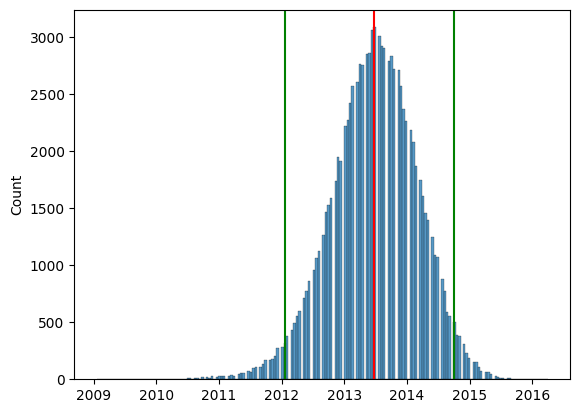

In [ ]:
#intervalo de confianza con un 95% de confianza
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
sns.histplot(serie_means);
plt.axvline(anio.mean(), color='red');
plt.axvline(limite_inferior, color='green');
plt.axvline(limite_superior, color='green');

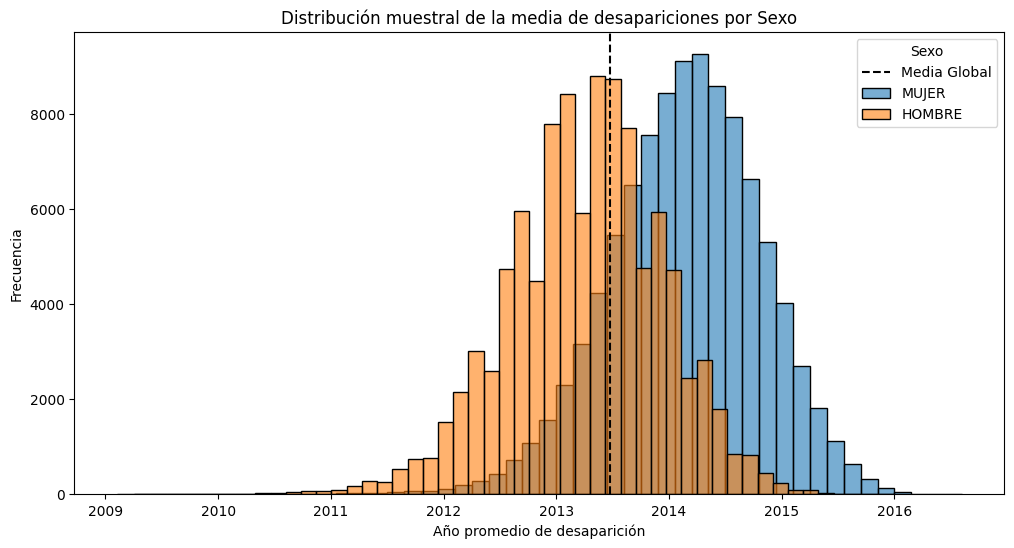

In [ ]:
df_current['Año'] = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce').dt.year
df_current = df_current.dropna(subset=['Año', 'Sexo'])
df_current = df_current[df_current['Año'] > 1950]

sexos = df_current['Sexo'].unique()
plt.figure(figsize=(12, 6))

for sexo in sexos:
    anio_sexo = df_current[df_current['Sexo'] == sexo]['Año']
    means = []
    for i in range(100_000):
        sample = anio_sexo.sample(n=20, replace=True)
        means.append(sample.mean())
    serie_means = pd.Series(means)
    sns.histplot(serie_means, bins=50, label=sexo, alpha=0.6)

plt.axvline(df_current['Año'].mean(), color='black', linestyle='dashed', label="Media Global")

plt.legend(title="Sexo")
plt.xlabel("Año promedio de desaparición")
plt.ylabel("Frecuencia")
plt.title("Distribución muestral de la media de desapariciones por Sexo")
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df_current['Fecha en que se le vio por ultima vez'] = pd.to_datetime(
    df_current['Fecha en que se le vio por ultima vez'], errors='coerce'
)

df_current = df_current[df_current['Fecha en que se le vio por ultima vez'].notna()]
df_current = df_current.dropna(subset=['Estatura', 'Sexo'])

df_current['Año'] = df_current['Fecha en que se le vio por ultima vez'].dt.year
df_current['Sexo'] = LabelEncoder().fit_transform(df_current['Sexo'])
X = df_current[['Estatura', 'Sexo']]
y = df_current['Año']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Precisión del modelo (R²): {score:.4f}")


Precisión del modelo (R²): 0.0121


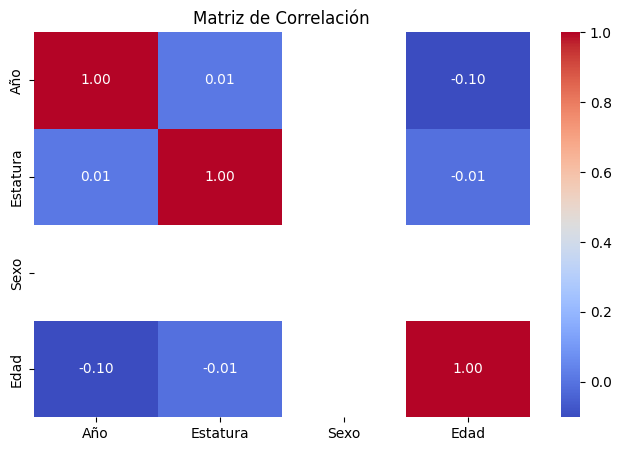

In [ ]:
df_current['Año'] = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce').dt.year
df_current['Sexo'] = df_current['Sexo'].map({'MASCULINO': 1, 'FEMENINO': 0})
df_current['Estatura'] = pd.to_numeric(df_current['Estatura'], errors='coerce')
df_current['Edad'] = pd.to_numeric(df_current['Edad'], errors='coerce')
corr_matrix = df_current[['Año', 'Estatura', 'Sexo', 'Edad']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
df_current = df.copy()
df_current.head()

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO


<ipython-input-153-faa5a6189ad4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Estatura'] = df_clean['Estatura'].apply(lambda x: x * 100 if x < 3 else x)


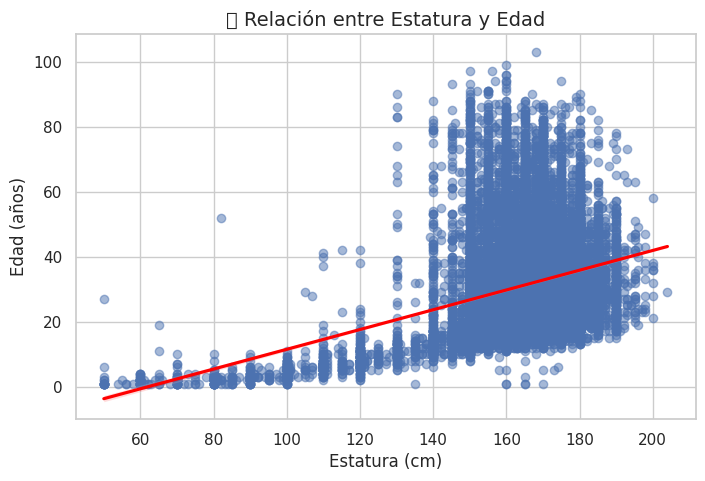

In [ ]:
df_current['Estatura'] = pd.to_numeric(df_current['Estatura'], errors='coerce')
df_current['Edad'] = pd.to_numeric(df_current['Edad'], errors='coerce')
df_clean = df_current.dropna(subset=['Estatura', 'Edad'])
df_clean['Estatura'] = df_clean['Estatura'].apply(lambda x: x * 100 if x < 3 else x)
df_clean = df_clean[(df_clean['Estatura'] >= 50) & (df_clean['Estatura'] <= 250)]
plt.figure(figsize=(8, 5))
sns.regplot(x=df_clean['Estatura'], y=df_clean['Edad'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('📊 Relación entre Estatura y Edad', fontsize=14)
plt.xlabel('Estatura (cm)')
plt.ylabel('Edad (años)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


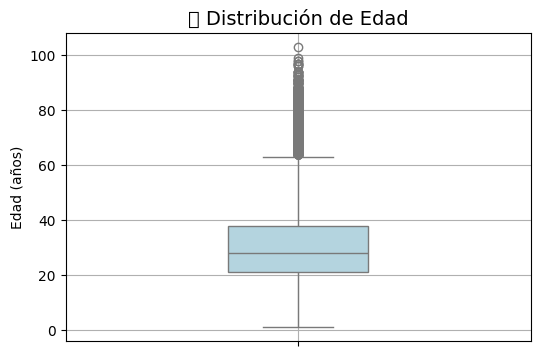

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_current['Edad'], color='lightblue', width=0.3)
plt.title('📦 Distribución de Edad', fontsize=14)
plt.ylabel('Edad (años)')
plt.grid(True)
plt.show()


<ipython-input-123-5b9a433598ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexo', data=df, palette='Set2')


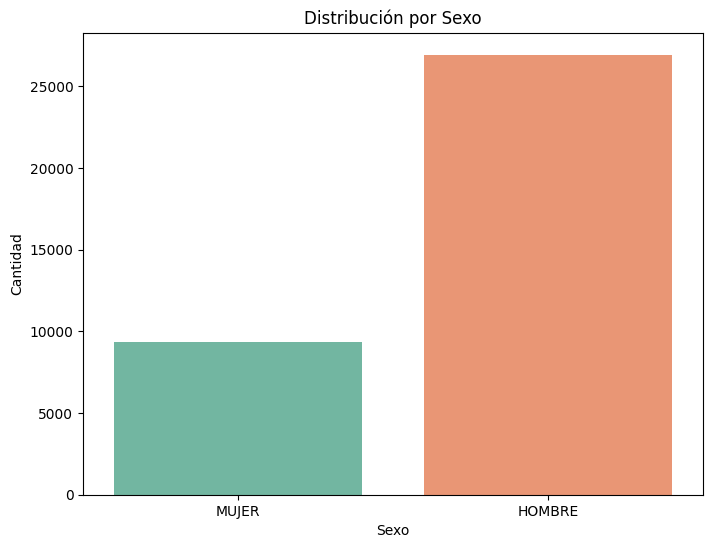

In [ ]:
# Gráfico de barras para "Sexo"
plt.figure(figsize=(8, 6))
sns.countplot(x='Sexo', data=df, palette='Set2')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


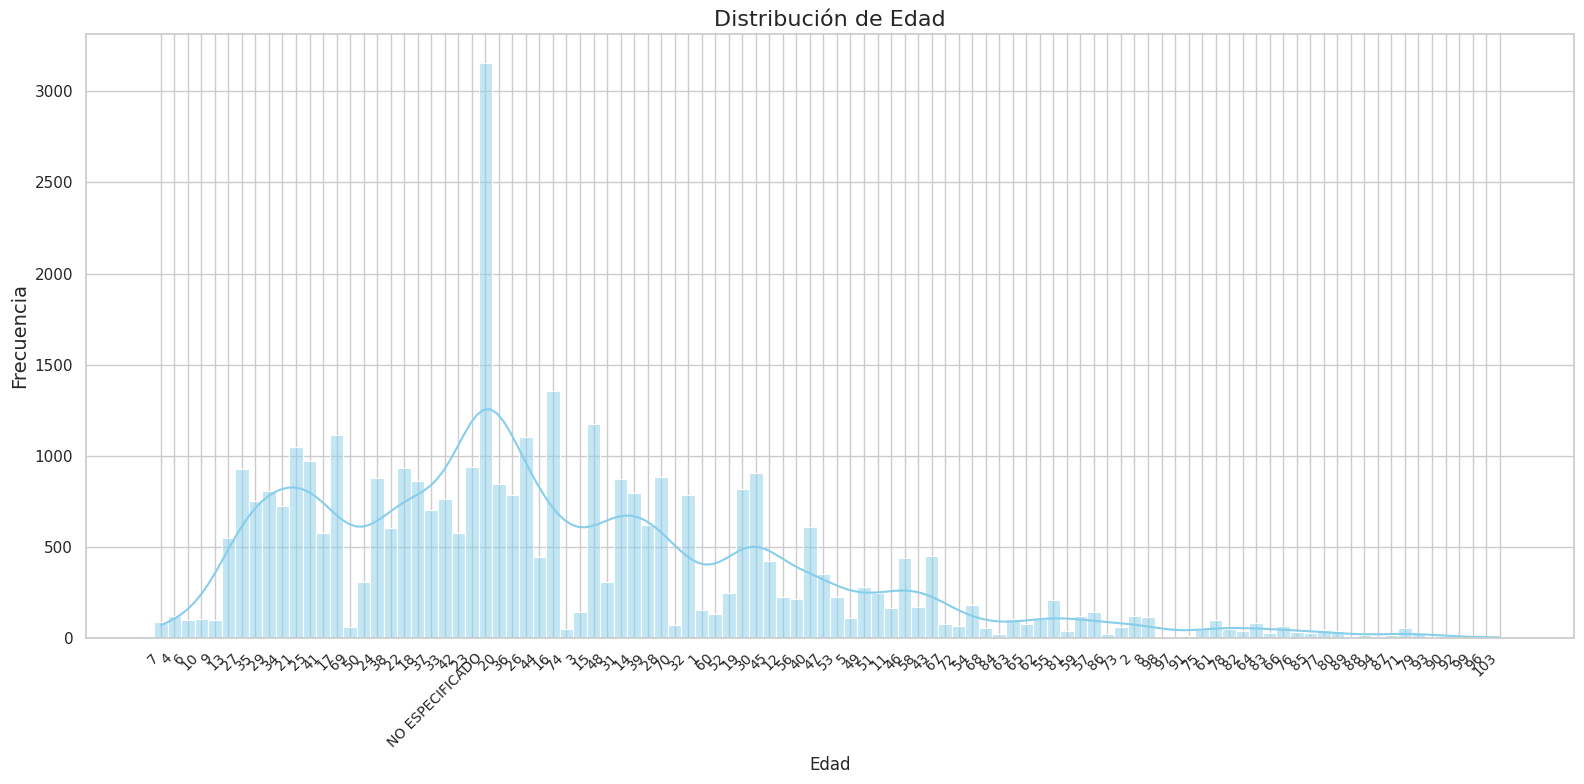

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.histplot(df['Edad'], kde=True, color='skyblue', bins=15)
plt.title('Distribución de Edad', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


<ipython-input-127-4e21643f2fff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Edad', data=df, palette='Set2')


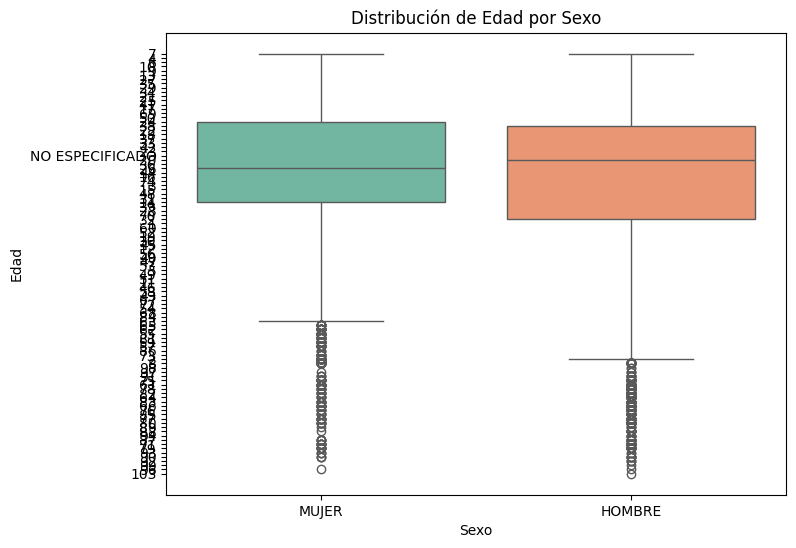

In [ ]:
#Valores atipicos
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sexo', y='Edad', data=df, palette='Set2')
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

                     Etnia  Conteo
0           AMUZGOS OAXACA      13
1                 CHATINOS      11
2              CHICHIMECAS       6
3              CHINANTECOS       5
4                   CHOLES       2
5                HUASTECOS       1
6                HUICHOLES       2
7                    MAMES       1
8                    MAYAS      27
9              MEXICANEROS       3
10                MIXTECOS       4
11                  NAHUAS      18
12         NO ESPECIFICADO   36133
13                 OTOMIES      10
14                   PAMES       1
15                   SERIS       4
16  TARAHUMARAS - RARAMURI       9
17             TLALPANECOS      11
18               TOTONACAS       2
19                  YAQUIS       2


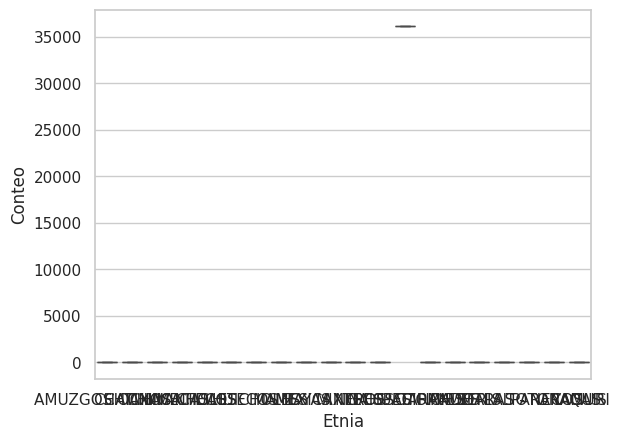

In [ ]:
estadisticas_etnia = df_current.groupby(['Etnia']).size().reset_index(name='Conteo')
print(estadisticas_etnia)


sns.boxplot(x='Etnia', y='Conteo', data=estadisticas_etnia)
plt.show()

In [ ]:
estadisticas_etnia = df_current.groupby(['Etnia']).size().reset_index(name='Conteo')
print(estadisticas_etnia)

                     Etnia  Conteo
0           AMUZGOS OAXACA      13
1                 CHATINOS      11
2              CHICHIMECAS       6
3              CHINANTECOS       5
4                   CHOLES       2
5                HUASTECOS       1
6                HUICHOLES       2
7                    MAMES       1
8                    MAYAS      27
9              MEXICANEROS       3
10                MIXTECOS       4
11                  NAHUAS      18
12         NO ESPECIFICADO   36133
13                 OTOMIES      10
14                   PAMES       1
15                   SERIS       4
16  TARAHUMARAS - RARAMURI       9
17             TLALPANECOS      11
18               TOTONACAS       2
19                  YAQUIS       2


In [ ]:
df_current['Fecha en que se le vio por ultima vez'] = pd.to_datetime(df_current['Fecha en que se le vio por ultima vez'], errors='coerce')

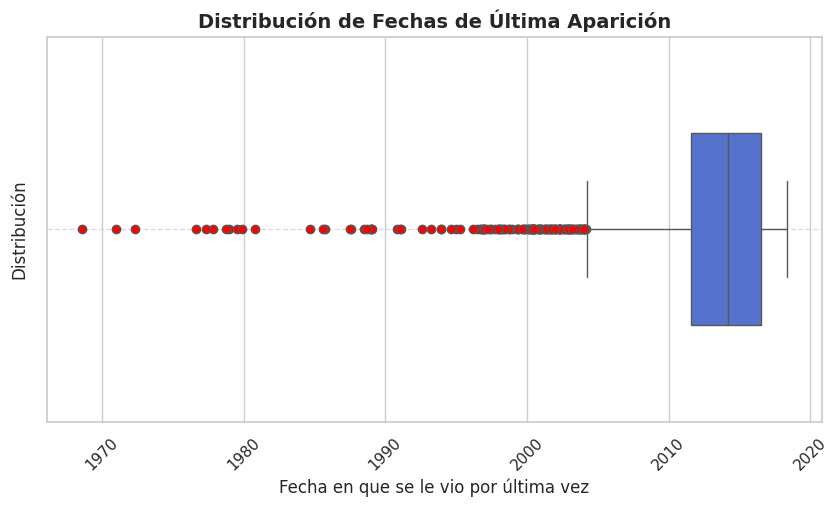

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_current['Fecha en que se le vio por ultima vez'], color='royalblue', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.xticks(rotation=45)
plt.title('Distribución de Fechas de Última Aparición', fontsize=14, fontweight='bold')
plt.xlabel('Fecha en que se le vio por última vez', fontsize=12)
plt.ylabel('Distribución', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

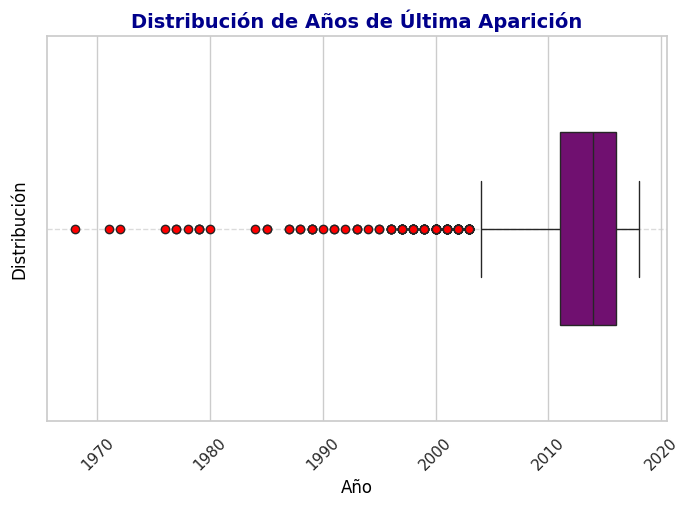

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_current['Año'], color='purple', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.xticks(rotation=45)
plt.title('Distribución de Años de Última Aparición', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Año', fontsize=12, color='black')
plt.ylabel('Distribución', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-206-351659a616a5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_current['Hora'] = pd.to_datetime(df_current['Hora en que se le vio por ultima vez'], errors='coerce').dt.hour


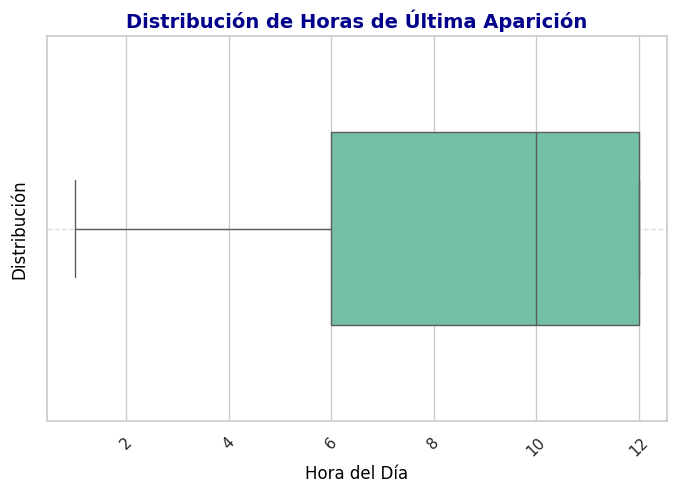

In [ ]:
df_current['Hora'] = pd.to_datetime(df_current['Hora en que se le vio por ultima vez'], errors='coerce').dt.hour

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_current['Hora'], color='mediumaquamarine', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.xticks(rotation=45)
plt.title('Distribución de Horas de Última Aparición', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Hora del Día', fontsize=12, color='black')
plt.ylabel('Distribución', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

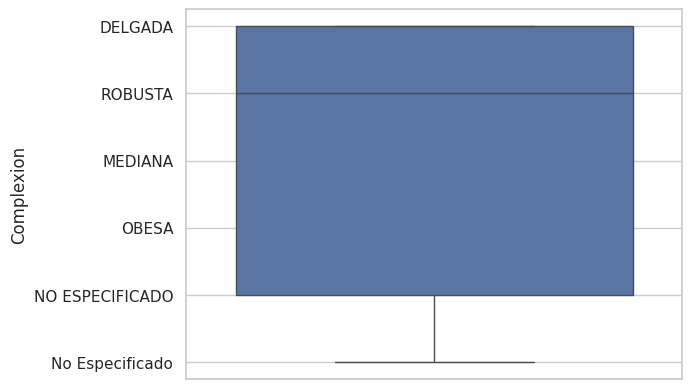

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_current['Complexion'], color='mediumaquamarine', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.xticks(rotation=45)
plt.title('Distribución de Complexión', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Complexión', fontsize=12, color='black')
plt.ylabel('Distribución', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

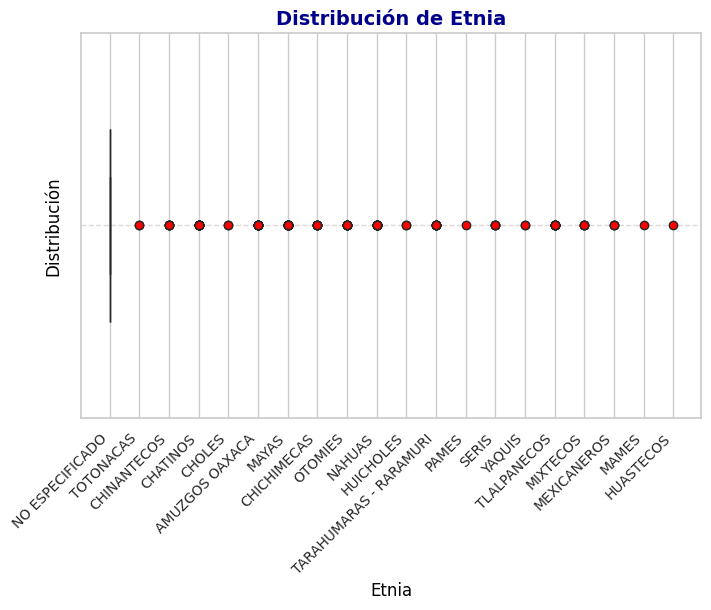

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_current['Etnia'], color='purple', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})
plt.xticks(rotation=45)
plt.title('Distribución de Etnia', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Etnia', fontsize=12, color='black')
plt.ylabel('Distribución', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)


plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2018-03-10'),
  Text(1, 0, '2018-03-20'),
  Text(2, 0, '2018-02-23'),
  Text(3, 0, '2018-02-17'),
  Text(4, 0, '2018-02-28'),
  Text(5, 0, '2018-02-12'),
  Text(6, 0, '2018-02-24'),
  Text(7, 0, '2018-01-31'),
  Text(8, 0, '2017-11-05'),
  Text(9, 0, '2018-02-01'),
  Text(10, 0, '2016-11-10'),
  Text(11, 0, '2018-02-10')])

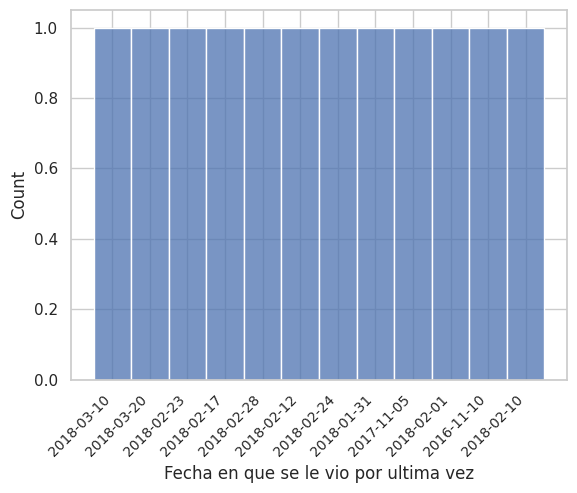

In [ ]:
sns.histplot(data=df, x='Fecha en que se le vio por ultima vez');
plt.xticks(rotation=45, ha='right', fontsize=10)


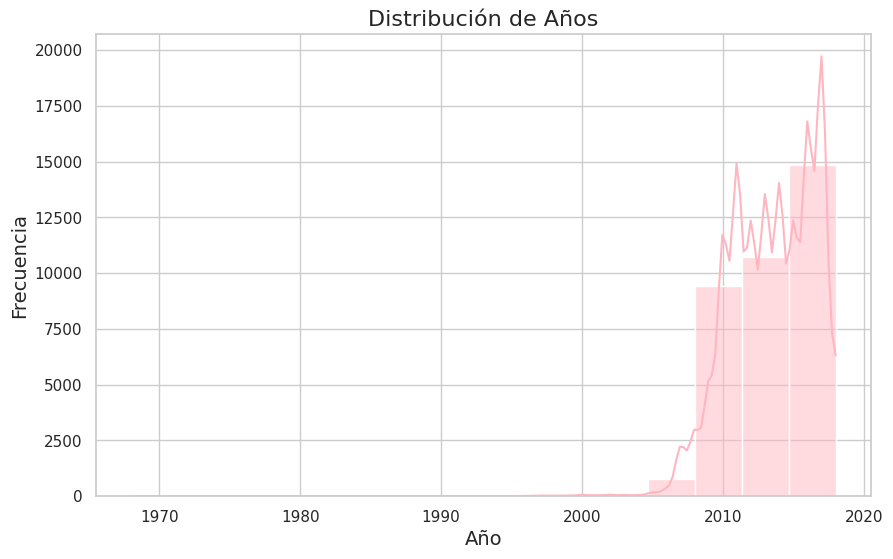

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")
sns.histplot(data=df_current, x='Año', color='#FFB6C1', kde=True, bins=15)
plt.title('Distribución de Años', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()



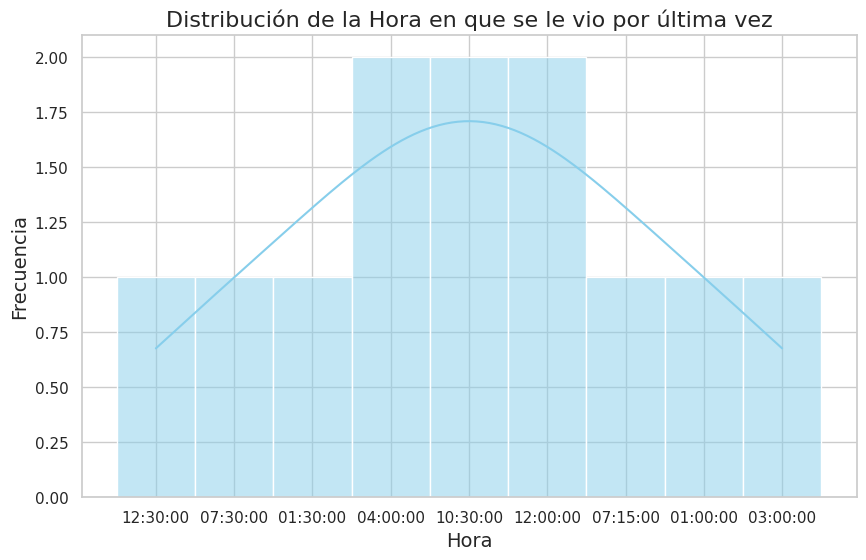

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")
sns.histplot(data=df, x='Hora en que se le vio por ultima vez', color='#87CEEB', kde=True, bins=15)
plt.title('Distribución de la Hora en que se le vio por última vez', fontsize=16)
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

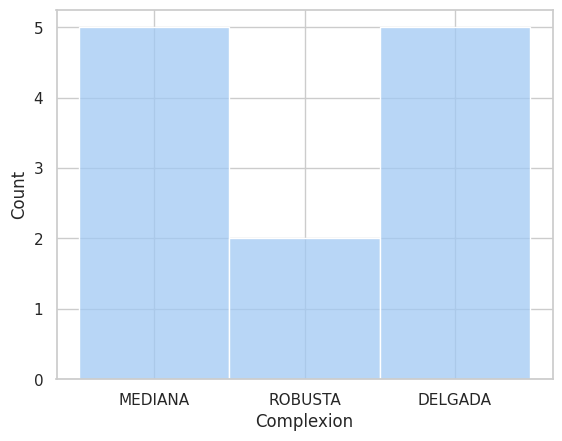

In [ ]:
sns.histplot(data=df, x='Complexion');

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
crosstab = pd.crosstab(df['Fecha'], [df['Hora en que se le vio por ultima vez'], df['Edad']])
print(crosstab)


Hora en que se le vio por ultima vez 01:00:00 01:30:00 03:00:00 04:00:00  \
Edad                                     13.0     9.0      1.0      1.0    
Fecha                                                                      
2016-11-10                                  1        0        0        0   
2017-11-05                                  0        0        0        0   
2018-01-31                                  0        0        0        0   
2018-02-01                                  0        0        0        1   
2018-02-10                                  0        0        1        0   
2018-02-12                                  0        0        0        0   
2018-02-17                                  0        0        0        1   
2018-02-23                                  0        1        0        0   
2018-02-24                                  0        0        0        0   
2018-02-28                                  0        0        0        0   
2018-03-10  

In [ ]:
df['Fecha en que se le vio por ultima vez'] = pd.to_datetime(df['Fecha en que se le vio por ultima vez'], errors='coerce')
df['Año'] = df['Fecha en que se le vio por ultima vez'].dt.year
crosstab = pd.crosstab(df['Año'], df['Municipio en que se le vio por ultima vez'])
print(crosstab)


Municipio en que se le vio por ultima vez  16   84   294  364  403  405  466  \
Año                                                                            
2016                                         0    0    0    1    0    0    0   
2017                                         0    0    0    0    0    0    1   
2018                                         1    1    1    0    2    1    0   

Municipio en que se le vio por ultima vez  569  898  957  
Año                                                       
2016                                         0    0    0  
2017                                         0    0    0  
2018                                         1    2    1  


In [ ]:
grouped_by_title = df.groupby('Descripcion de senas particulares')['Entidad en que se le vio por ultima vez'].last()

In [ ]:
grouped_by_title

,Entidad en que se le vio por ultima vez
Descripcion de senas particulares,
".56 MTS DE ESTATURA, DE COMPLEXION DELGADA, DE TEZ MORENA, DE 37 AÑOS DE EDAD, DE CABELLO CORTO NEGRO, CON BIGOTE, EL CUAL TIENE EN UNO DE LOS BRAZOS DOS TATUAJES CON LAS LEYENDAS VIRIDIANA E ILEANA, Y EN EL OTRO BRAZO CHAGO Y SB, EN EL ESTOMAGO LA LEYENDA GALVAN, ASI COMO EN LA ESPALDA DULCE MARIA, EL CUAL ES MECANICO",TAMAULIPAS
".90 DE ESTATURA, ES DIESTRO, COMPLEXION DELGADO, PESABA 90 KILOS APROXIMADAMENTE; DE TEZ MORENO CLARO, PELO NEGRO CORTO, CEJA POBLADA NEGRA, OJOS DE COLOR CAFE OSCURO, NARIZ ANCHA, BOCA GRANDE, LABIOS MEDIANOS, TIENE BARBA CERRADA, COMO SEÑA PARTICULAR TIENE UN LUNAR EN EL PECHO EN COLOR CAFE QUE LE ABARCA EL COSTADO IZQUIERDO DEL PECHO, TRAIA UN PIERCING EN EL LABIO INFERIOR HACIA EL COSTADO IZQUIERDO, TIENE UNA PERFORACION EN LA OREJA IZQUIERDA;",TAMAULIPAS
02 CICATRICES UNA DE UNA CIRUJIA DE LA PAENDICES Y OTRA CICATRIZ PEQUEÑA DE FORMA CIRCULAR EN EL CHAMORRO DEL PIE DERECHO.,JALISCO
"1) TATUAJE EN ESPALDA DICE ""BANDA"" Y LA IMAGEN DE LA VIRGEN DE GUADALUPE; 2) BRAZO DERECHO UNA SERPIENTE; 3) BRAZO IZQUIERDO QUE DICE ""BANDA"" Y UN AGUILA; 4) PIERNA DERECHA DICE ""ISMAEL"" Y DEBAJO LA LETRA ""S"" DICE ""ROSARIO""; 5) ANTEBRAZO DIBUJO DE LLAMAS;",CHIHUAHUA
"1, ALA ALTURA DELAS MUÑECAS, DEL BRAZO DERECHO,",MICHOACAN
...,...
"Y TIENE UN TATUAJE EN EL PECHO EL NOMBRE LIDIA, Y EN EL CUELLO LUCIA, Y EN EL BRAZO IZQUIERDO TIENE TATUADAS DOS CARAS",TAMAULIPAS
"YA QUE EN LA PARTE DE ABAJO LE FALTAN DOS DIENTES, CUENTA CON UN TATUAJE EN SU PIERNA DERECHA EN LA PARTE MEDIA CON LA LETRA A Y TRES LINEAS CON TINTA DE COLOR NEGRO, Y CUENTA CON UNA CICATRIZ EN SU ESTOMAGO DE APROXIMADAMENTE 5 CENTIMETROS",SINALOA
"YA QUE MI ESPOSO ES DE COMPLEXION DELGADA, DE PIEL MORENA, DE OJOS CAFE CLARO, DE FRENTE ANGOSTA, DE PELO CANOSOS, DE NARIZ AFILADA, DE BOCA MEDIANA DE LABIOS GRUESOS CON BIGOTE Y BARBA RASURADA, DE CEJAS POBLADAS, Y EL CUAL VESTIA UN PANTALON DE MEZCLILLA COLOR NEGRO, UNA CAMISA CAFE CON RAYAS CELESTE, ZAPATOS COLOR CAFE,",TAMAULIPAS


In [ ]:
#Limpiamos el  dataset

# todas las letras a minúsculas
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '', regex=True)
grouped_by_title = grouped_by_title.str.replace('\d', '', regex=True)
grouped_by_title = grouped_by_title.str.replace('\\n', '', regex=True)
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

,Entidad en que se le vio por ultima vez
Descripcion de senas particulares,
".56 MTS DE ESTATURA, DE COMPLEXION DELGADA, DE TEZ MORENA, DE 37 AÑOS DE EDAD, DE CABELLO CORTO NEGRO, CON BIGOTE, EL CUAL TIENE EN UNO DE LOS BRAZOS DOS TATUAJES CON LAS LEYENDAS VIRIDIANA E ILEANA, Y EN EL OTRO BRAZO CHAGO Y SB, EN EL ESTOMAGO LA LEYENDA GALVAN, ASI COMO EN LA ESPALDA DULCE MARIA, EL CUAL ES MECANICO",tamaulipas
".90 DE ESTATURA, ES DIESTRO, COMPLEXION DELGADO, PESABA 90 KILOS APROXIMADAMENTE; DE TEZ MORENO CLARO, PELO NEGRO CORTO, CEJA POBLADA NEGRA, OJOS DE COLOR CAFE OSCURO, NARIZ ANCHA, BOCA GRANDE, LABIOS MEDIANOS, TIENE BARBA CERRADA, COMO SEÑA PARTICULAR TIENE UN LUNAR EN EL PECHO EN COLOR CAFE QUE LE ABARCA EL COSTADO IZQUIERDO DEL PECHO, TRAIA UN PIERCING EN EL LABIO INFERIOR HACIA EL COSTADO IZQUIERDO, TIENE UNA PERFORACION EN LA OREJA IZQUIERDA;",tamaulipas
02 CICATRICES UNA DE UNA CIRUJIA DE LA PAENDICES Y OTRA CICATRIZ PEQUEÑA DE FORMA CIRCULAR EN EL CHAMORRO DEL PIE DERECHO.,jalisco
"1) TATUAJE EN ESPALDA DICE ""BANDA"" Y LA IMAGEN DE LA VIRGEN DE GUADALUPE; 2) BRAZO DERECHO UNA SERPIENTE; 3) BRAZO IZQUIERDO QUE DICE ""BANDA"" Y UN AGUILA; 4) PIERNA DERECHA DICE ""ISMAEL"" Y DEBAJO LA LETRA ""S"" DICE ""ROSARIO""; 5) ANTEBRAZO DIBUJO DE LLAMAS;",chihuahua
"1, ALA ALTURA DELAS MUÑECAS, DEL BRAZO DERECHO,",michoacan
...,...
"Y TIENE UN TATUAJE EN EL PECHO EL NOMBRE LIDIA, Y EN EL CUELLO LUCIA, Y EN EL BRAZO IZQUIERDO TIENE TATUADAS DOS CARAS",tamaulipas
"YA QUE EN LA PARTE DE ABAJO LE FALTAN DOS DIENTES, CUENTA CON UN TATUAJE EN SU PIERNA DERECHA EN LA PARTE MEDIA CON LA LETRA A Y TRES LINEAS CON TINTA DE COLOR NEGRO, Y CUENTA CON UNA CICATRIZ EN SU ESTOMAGO DE APROXIMADAMENTE 5 CENTIMETROS",sinaloa
"YA QUE MI ESPOSO ES DE COMPLEXION DELGADA, DE PIEL MORENA, DE OJOS CAFE CLARO, DE FRENTE ANGOSTA, DE PELO CANOSOS, DE NARIZ AFILADA, DE BOCA MEDIANA DE LABIOS GRUESOS CON BIGOTE Y BARBA RASURADA, DE CEJAS POBLADAS, Y EL CUAL VESTIA UN PANTALON DE MEZCLILLA COLOR NEGRO, UNA CAMISA CAFE CON RAYAS CELESTE, ZAPATOS COLOR CAFE,",tamaulipas


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)

tokenized

,Entidad en que se le vio por ultima vez
Descripcion de senas particulares,
".56 MTS DE ESTATURA, DE COMPLEXION DELGADA, DE TEZ MORENA, DE 37 AÑOS DE EDAD, DE CABELLO CORTO NEGRO, CON BIGOTE, EL CUAL TIENE EN UNO DE LOS BRAZOS DOS TATUAJES CON LAS LEYENDAS VIRIDIANA E ILEANA, Y EN EL OTRO BRAZO CHAGO Y SB, EN EL ESTOMAGO LA LEYENDA GALVAN, ASI COMO EN LA ESPALDA DULCE MARIA, EL CUAL ES MECANICO",[tamaulipas]
".90 DE ESTATURA, ES DIESTRO, COMPLEXION DELGADO, PESABA 90 KILOS APROXIMADAMENTE; DE TEZ MORENO CLARO, PELO NEGRO CORTO, CEJA POBLADA NEGRA, OJOS DE COLOR CAFE OSCURO, NARIZ ANCHA, BOCA GRANDE, LABIOS MEDIANOS, TIENE BARBA CERRADA, COMO SEÑA PARTICULAR TIENE UN LUNAR EN EL PECHO EN COLOR CAFE QUE LE ABARCA EL COSTADO IZQUIERDO DEL PECHO, TRAIA UN PIERCING EN EL LABIO INFERIOR HACIA EL COSTADO IZQUIERDO, TIENE UNA PERFORACION EN LA OREJA IZQUIERDA;",[tamaulipas]
02 CICATRICES UNA DE UNA CIRUJIA DE LA PAENDICES Y OTRA CICATRIZ PEQUEÑA DE FORMA CIRCULAR EN EL CHAMORRO DEL PIE DERECHO.,[jalisco]
"1) TATUAJE EN ESPALDA DICE ""BANDA"" Y LA IMAGEN DE LA VIRGEN DE GUADALUPE; 2) BRAZO DERECHO UNA SERPIENTE; 3) BRAZO IZQUIERDO QUE DICE ""BANDA"" Y UN AGUILA; 4) PIERNA DERECHA DICE ""ISMAEL"" Y DEBAJO LA LETRA ""S"" DICE ""ROSARIO""; 5) ANTEBRAZO DIBUJO DE LLAMAS;",[chihuahua]
"1, ALA ALTURA DELAS MUÑECAS, DEL BRAZO DERECHO,",[michoacan]
...,...
"Y TIENE UN TATUAJE EN EL PECHO EL NOMBRE LIDIA, Y EN EL CUELLO LUCIA, Y EN EL BRAZO IZQUIERDO TIENE TATUADAS DOS CARAS",[tamaulipas]
"YA QUE EN LA PARTE DE ABAJO LE FALTAN DOS DIENTES, CUENTA CON UN TATUAJE EN SU PIERNA DERECHA EN LA PARTE MEDIA CON LA LETRA A Y TRES LINEAS CON TINTA DE COLOR NEGRO, Y CUENTA CON UNA CICATRIZ EN SU ESTOMAGO DE APROXIMADAMENTE 5 CENTIMETROS",[sinaloa]
"YA QUE MI ESPOSO ES DE COMPLEXION DELGADA, DE PIEL MORENA, DE OJOS CAFE CLARO, DE FRENTE ANGOSTA, DE PELO CANOSOS, DE NARIZ AFILADA, DE BOCA MEDIANA DE LABIOS GRUESOS CON BIGOTE Y BARBA RASURADA, DE CEJAS POBLADAS, Y EL CUAL VESTIA UN PANTALON DE MEZCLILLA COLOR NEGRO, UNA CAMISA CAFE CON RAYAS CELESTE, ZAPATOS COLOR CAFE,",[tamaulipas]


In [ ]:
all_words = tokenized.sum()

all_words

['tamaulipas',
 'tamaulipas',
 'jalisco',
 'chihuahua',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'chihuahua',
 'colima',
 'sinaloa',
 'guerrero',
 'jalisco',
 'sinaloa',
 'guerrero',
 'jalisco',
 'guerrero',
 'jalisco',
 'jalisco',
 'jalisco',
 'jalisco',
 'jalisco',
 'michoacan',
 'jalisco',
 'michoacan',
 'michoacan',
 'zacatecas',
 'michoacan',
 'morelos',
 'chihuahua',
 'puebla',
 'chihuahua',
 'tamaulipas',
 'chihuahua',
 'chihuahua',
 'chihuahua',
 'tamaulipas',
 'coahuila',
 'de',
 'zaragoza',
 'tamaulipas',
 'tamaulipas',
 'puebla',
 'puebla',
 'tamaulipas',
 'ciudad',
 'de',
 'mexico',
 'estado',
 'de',
 'mexico',
 'durango',
 'ciudad',
 'de',
 'mexico',
 'chihuahua',
 'jalisco',
 'sonora',
 'michoacan',
 'michoacan',
 'michoacan',
 'puebla',
 'puebla',
 'tlaxcala',
 'puebla',
 'ciudad',
 'de',
 'mexico',
 'baja',
 'california',
 'coahuila',
 'de',
 '

In [ ]:
text = nltk.Text(all_words)

text

<Text: tamaulipas tamaulipas jalisco chihuahua michoacan michoacan michoacan michoacan...>

In [ ]:
len(text)

21482

In [ ]:
len(set(text)) / len(text)

0.0019551252211153524

In [ ]:
text.collocations()

baja california; mexico estado; nuevo leon; sinaloa sinaloa; guerrero
guerrero; tamaulipas tamaulipas; luis potosi; san luis; quintana roo;
puebla puebla; jalisco jalisco; sonora sonora; zacatecas zacatecas;
california sur; leon nuevo; chihuahua chihuahua; tamaulipas estado;
michoacan michoacan; zaragoza coahuila; veracruz veracruz


In [ ]:
text

<Text: tamaulipas tamaulipas jalisco chihuahua michoacan michoacan michoacan michoacan...>

In [ ]:
freq_dist = nltk.FreqDist(text)

freq_dist

FreqDist({'tamaulipas': 2813, 'jalisco': 2396, 'de': 2192, 'sinaloa': 1427, 'mexico': 1275, 'puebla': 1235, 'sonora': 1186, 'guerrero': 1065, 'coahuila': 917, 'zaragoza': 917, ...})

In [ ]:
freq_dist.most_common(20)

[('tamaulipas', 2813),
 ('jalisco', 2396),
 ('de', 2192),
 ('sinaloa', 1427),
 ('mexico', 1275),
 ('puebla', 1235),
 ('sonora', 1186),
 ('guerrero', 1065),
 ('coahuila', 917),
 ('zaragoza', 917),
 ('estado', 890),
 ('chihuahua', 824),
 ('michoacan', 452),
 ('colima', 431),
 ('baja', 398),
 ('california', 398),
 ('zacatecas', 392),
 ('ciudad', 385),
 ('veracruz', 338),
 ('durango', 237)]

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

all_words_without_stopwords = [word for word in all_words if word not in english_stopwords]

all_words_without_stopwords

['tamaulipas',
 'tamaulipas',
 'jalisco',
 'chihuahua',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'michoacan',
 'chihuahua',
 'colima',
 'sinaloa',
 'guerrero',
 'jalisco',
 'sinaloa',
 'guerrero',
 'jalisco',
 'guerrero',
 'jalisco',
 'jalisco',
 'jalisco',
 'jalisco',
 'jalisco',
 'michoacan',
 'jalisco',
 'michoacan',
 'michoacan',
 'zacatecas',
 'michoacan',
 'morelos',
 'chihuahua',
 'puebla',
 'chihuahua',
 'tamaulipas',
 'chihuahua',
 'chihuahua',
 'chihuahua',
 'tamaulipas',
 'coahuila',
 'de',
 'zaragoza',
 'tamaulipas',
 'tamaulipas',
 'puebla',
 'puebla',
 'tamaulipas',
 'ciudad',
 'de',
 'mexico',
 'estado',
 'de',
 'mexico',
 'durango',
 'ciudad',
 'de',
 'mexico',
 'chihuahua',
 'jalisco',
 'sonora',
 'michoacan',
 'michoacan',
 'michoacan',
 'puebla',
 'puebla',
 'tlaxcala',
 'puebla',
 'ciudad',
 'de',
 'mexico',
 'baja',
 'california',
 'coahuila',
 'de',
 '

In [ ]:
freq_dist_without_stopwords = nltk.FreqDist(all_words_without_stopwords)

freq_dist_without_stopwords.most_common(30)

[('tamaulipas', 2813),
 ('jalisco', 2396),
 ('de', 2192),
 ('sinaloa', 1427),
 ('mexico', 1275),
 ('puebla', 1235),
 ('sonora', 1186),
 ('guerrero', 1065),
 ('coahuila', 917),
 ('zaragoza', 917),
 ('estado', 890),
 ('chihuahua', 824),
 ('michoacan', 452),
 ('colima', 431),
 ('baja', 398),
 ('california', 398),
 ('zacatecas', 392),
 ('ciudad', 385),
 ('veracruz', 338),
 ('durango', 237),
 ('nuevo', 182),
 ('leon', 182),
 ('queretaro', 164),
 ('morelos', 126),
 ('nayarit', 92),
 ('guanajuato', 80),
 ('chiapas', 69),
 ('yucatan', 59),
 ('hidalgo', 59),
 ('oaxaca', 53)]

In [ ]:
freq_dist_without_stopwords.hapaxes()

[]

In [ ]:
freq_dist_without_stopwords.most_common(20)

[('tamaulipas', 2813),
 ('jalisco', 2396),
 ('de', 2192),
 ('sinaloa', 1427),
 ('mexico', 1275),
 ('puebla', 1235),
 ('sonora', 1186),
 ('guerrero', 1065),
 ('coahuila', 917),
 ('zaragoza', 917),
 ('estado', 890),
 ('chihuahua', 824),
 ('michoacan', 452),
 ('colima', 431),
 ('baja', 398),
 ('california', 398),
 ('zacatecas', 392),
 ('ciudad', 385),
 ('veracruz', 338),
 ('durango', 237)]

In [ ]:
freq_dist_without_stopwords.hapaxes()

[]

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_without_stopwords.most_common(20))))

most_common_20

array([['tamaulipas', '2813'],
       ['jalisco', '2396'],
       ['de', '2192'],
       ['sinaloa', '1427'],
       ['mexico', '1275'],
       ['puebla', '1235'],
       ['sonora', '1186'],
       ['guerrero', '1065'],
       ['coahuila', '917'],
       ['zaragoza', '917'],
       ['estado', '890'],
       ['chihuahua', '824'],
       ['michoacan', '452'],
       ['colima', '431'],
       ['baja', '398'],
       ['california', '398'],
       ['zacatecas', '392'],
       ['ciudad', '385'],
       ['veracruz', '338'],
       ['durango', '237']], dtype='<U21')

In [ ]:
words = most_common_20[:, 0]
frequencies = most_common_20[:, 1].astype(int)

In [ ]:
from wordcloud import WordCloud

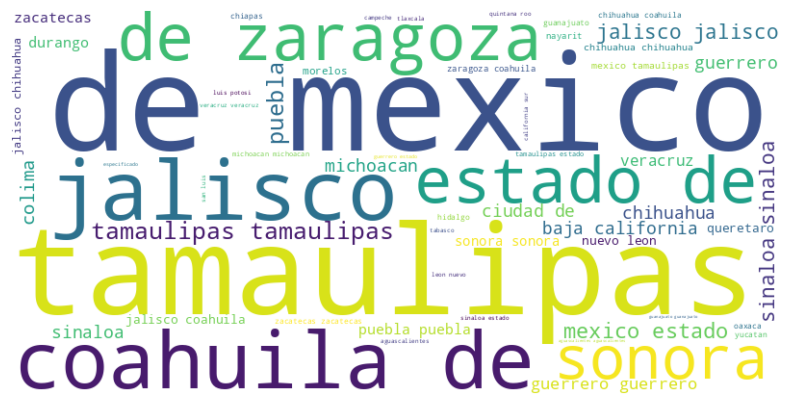

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words_without_stopwords))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()